**ANALYSIS OF FOREST FIRE ACCIDENTS IN CANADA**



In [2]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

**DATA VISUALIZATION**

---



VISUALIZATION USING PIE,LINE AND BARPLOT

In [ ]:
#Reading the excel file
file_path = "/content/forestfiredata,area200 ha.xlsx"
wildfire_data = pd.read_excel(file_path)
print(wildfire_data)


    YEAR  FIRES      TOTAL_HA    MAX_SIZE_HA  FIRES >200ha  TOTAL_HA (>200ha)
0   2021   6709  4.078897e+06  271700.519953           596       4.038710e+06
1   2020   4001  2.182320e+05   50892.000000            80       2.061530e+05
2   2019   4062  1.786214e+06  350135.000000           192       1.765436e+06
3   2018   7111  2.328851e+06  156775.000000           428       2.290130e+06
4   2017   5654  3.589423e+06  521012.000000           468       3.557143e+06
5   2016   5259  1.319573e+06  485124.000000           204       1.296927e+06
6   2015   7029  3.908377e+06  245237.000000           546       3.873579e+06
7   2014   5016  4.545655e+06  632984.000000           341       4.521266e+06
8   2013   6246  4.268421e+06  501689.000000           374       4.242471e+06
9   2012   7910  1.811679e+06  134603.000000           420       1.781048e+06
10  2011   4674  2.397422e+06  577647.000000           232       2.381861e+06
11  2010   7312  3.177960e+06  453144.000000           385      

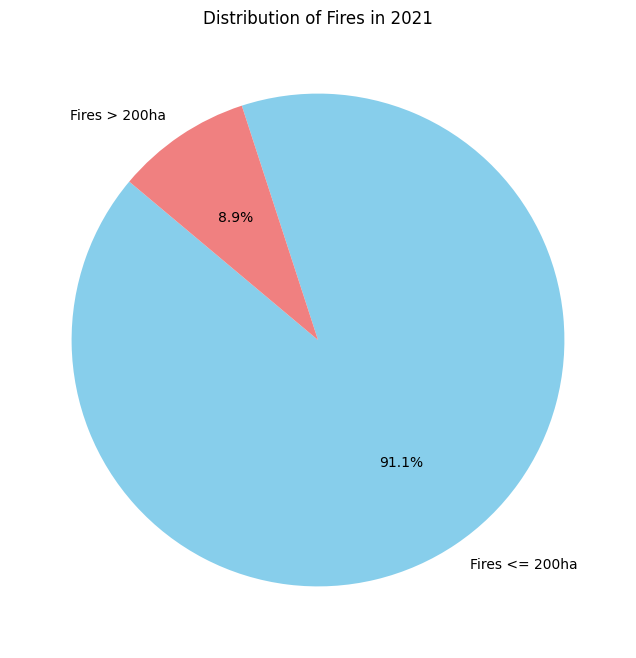

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
data_2021 = wildfire_data[wildfire_data['YEAR'] == 2021]

# Pie chart showing the distribution of fires based on size of land(hectares)
labels = ['Fires <= 200ha', 'Fires > 200ha']
sizes = [data_2021['FIRES'].values[0] - data_2021['FIRES >200ha'].values[0], data_2021['FIRES >200ha'].values[0]]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Fires in 2021')
plt.show()

plt.savefig('')

# Download the image file
from google.colab import files
files.download('sample_chart.png')


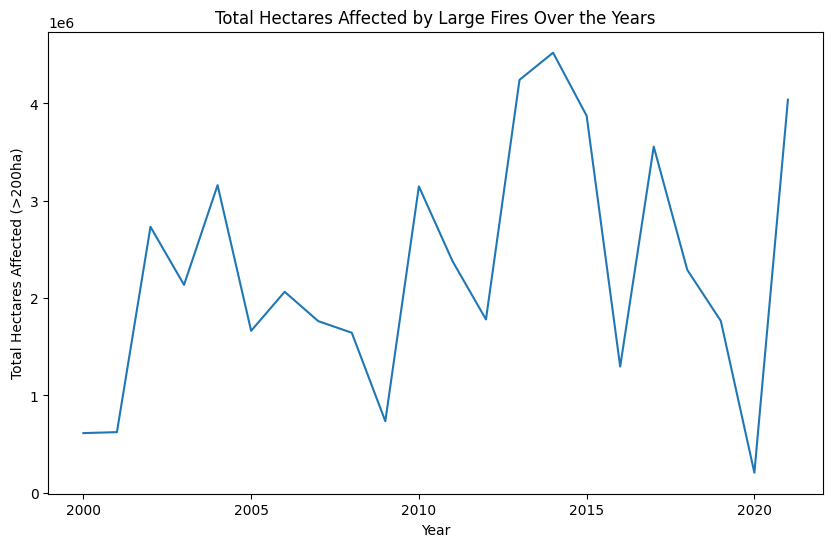

In [ ]:
# Total Hectares Affected by Large Fires Over the Years
plt.figure(figsize=(10, 6))
sns.lineplot(x='YEAR', y='TOTAL_HA (>200ha)', data=wildfire_data)
plt.title('Total Hectares Affected by Large Fires Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Hectares Affected (>200ha)')
plt.show()

*DATASET FROM CIFFC FROM 2000 TO 2023*

In [ ]:
file_path2 = '/content/forest number and area.xlsx'
df2 = pd.read_excel(file_path2)
print(df2)


    Year      Area  Number of forest fires
0   2000    632396                    5051
1   2001    607292                    6907
2   2002   2763473                    7242
3   2003   1585569                    7969
4   2004   3104010                    6325
5   2005   1728145                    7292
6   2006   2031702                    9482
7   2007   1661422                    6647
8   2008   1646972                    5873
9   2009    326420                    3766
10  2010   3182609                    7045
11  2011   2563289                    4327
12  2012   1928138                    7337
13  2013   3798229                    5900
14  2014   4607677                    4883
15  2015   3969536                    6773
16  2016   1400627                    5026
17  2017   3456768                    5305
18  2018   2266585                    6845
19  2019   1838953                    4258
20  2020    229267                    3928
21  2021   4299448                    6525
22  2022   

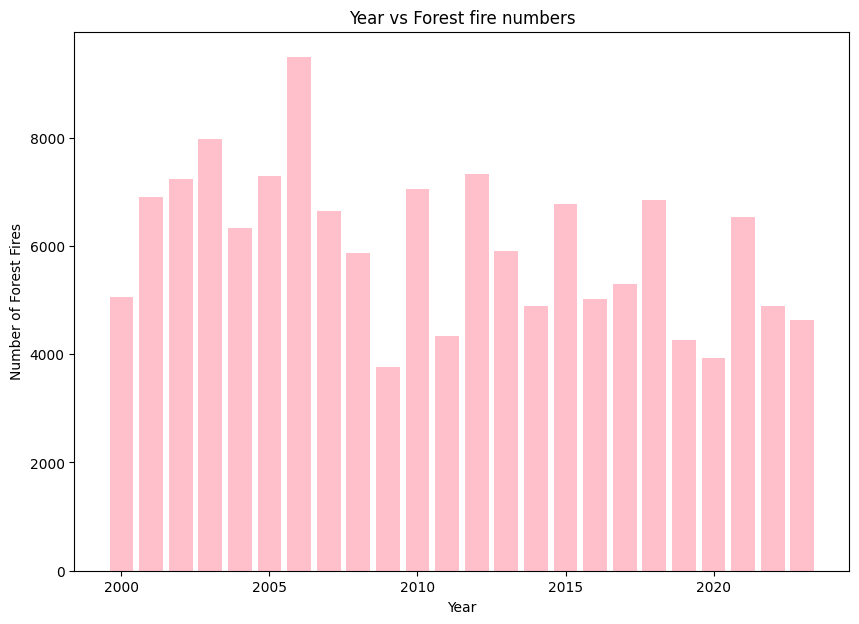

In [ ]:
plt.figure(figsize=(10, 7))

# Plotting Bar Plot
plt.bar(df2['Year'], df2['Number of forest fires'], color='pink')
plt.title('Year vs Forest fire numbers')
plt.xlabel('Year')
plt.ylabel('Number of Forest Fires')

plt.show()

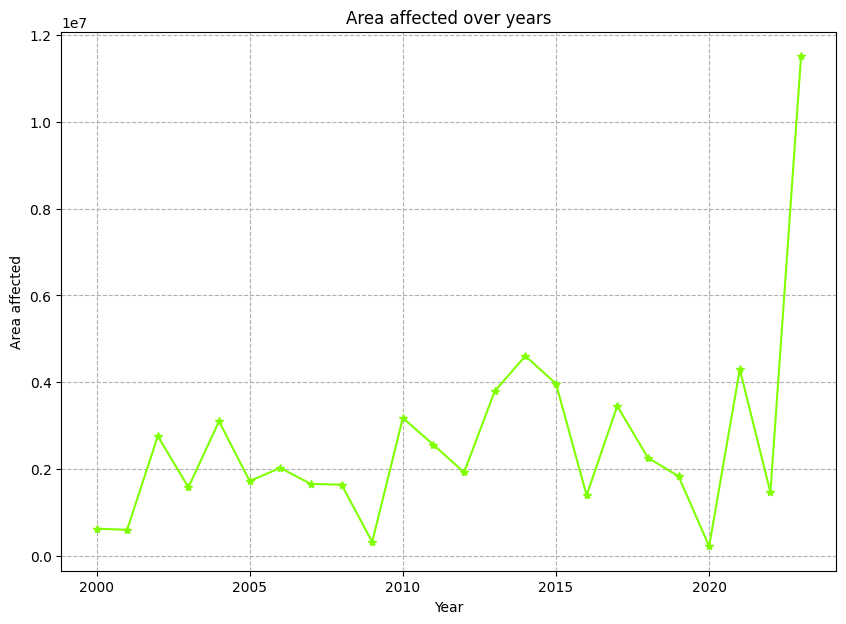

In [ ]:
plt.figure(figsize=(10, 7))
#Plotting line graph
plt.plot(df2['Year'], df2['Area'], marker='*', color='chartreuse', linestyle='-',label="Area affected by Forest Fires")
plt.grid(True,linestyle='--')
plt.title("Area affected over years")
plt.xlabel('Year')
plt.ylabel('Area affected')

plt.show()

**HOTSPOT AREAS ANALYSIS IN CANADA IN 2020**

In [3]:
#Reading excel file of forest fires wrt to Provinces in Canada
file_path4 = '/content/forestfire wrt to province.xlsx'
df4 = pd.read_excel(file_path4)
print(df4)

                      PRENAME  No of forest fire
0   Newfoundland and Labrador                 82
1        Prince Edward Island                  1
2                 Nova Scotia                113
3               New Brunswick                180
4                      Quebec                625
5                     Ontario               1198
6                    Manitoba                460
7                Saskatchewan                635
8                     Alberta               1342
9            British Columbia               1635
10                      Yukon                112
11      Northwest Territories                140


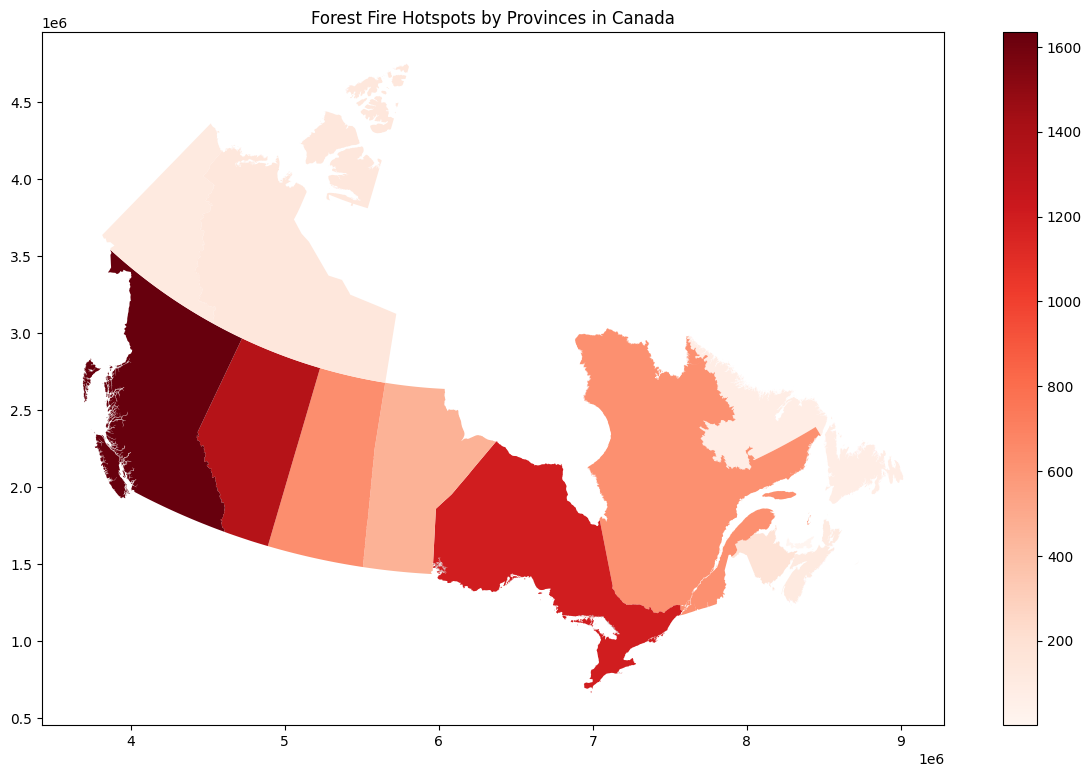

In [4]:
#Reading shapefile of Canada provinces
gdf = gpd.read_file('/content/lpr_000b16a_e.shp')

# Merging the dataset with the GeoDataFrame based on the province column
merged_data = gdf.merge(df4, on='PRENAME')

# Plotting the provinces with color intensity based on the number of fires
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
merged_data.plot(column='No of forest fire', cmap='Reds', legend=True, ax=ax)

plt.title('Forest Fire Hotspots by Provinces in Canada')
plt.show()

VISUALIZATION OF CAUSE OF FOREST FIRE ACCIDENTS IN CANADA USING BARPLOT

In [ ]:
file_name="/content/cause of fire.xlsx"
df5=pd.read_excel(file_name)
print(df5)

              Cause  2019  2020
0         Lightning  1477  1102
1  Human activities  2403  2719
2       Unspecified   170   172
3   Prescribed burn    12     8


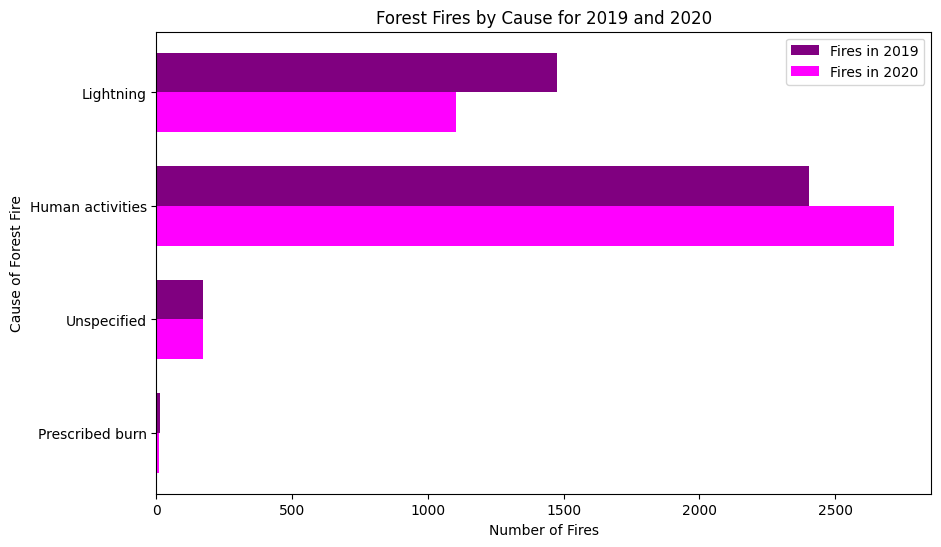

In [ ]:
# Plotting the horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
bar_positions_2019 = range(len(df5['Cause']))
bar_positions_2020 = [pos + bar_width for pos in bar_positions_2019]

bars_2019 = ax.barh(bar_positions_2019, df5['2019'], bar_width, color='purple', label='Fires in 2019')
bars_2020 = ax.barh(bar_positions_2020, df5['2020'], bar_width, color='magenta', label='Fires in 2020')


ax.legend()


ax.set_yticks([pos + bar_width/2 for pos in bar_positions_2019])
ax.set_yticklabels(df5['Cause'])
ax.invert_yaxis()

ax.set_xlabel('Number of Fires')
ax.set_ylabel('Cause of Forest Fire')
ax.set_title('Forest Fires by Cause for 2019 and 2020')

plt.show()